# GEQIE NEQR Example

## Setup

### Imports

In [1]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt
# import seaborn as sns

import geqie
from geqie.encodings import ncqi

## Encoding

### Opening the image

Opening the test image and normalizing its pixel values to $[0.0, 1.0]$.

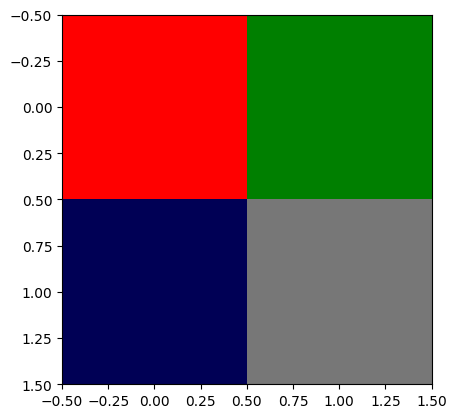

In [2]:
image = Image.open("../assets/rgb.png")
image = np.asarray(image)
plt.imshow(image)

In [17]:
print(image[:,:,0])
print(image[:,:,1])
print(image[:,:,2])

[[255   0]
 [  0 119]]
[[  0 127]
 [  0 119]]
[[  0   0]
 [ 85 119]]


### Encoding using unitary gate

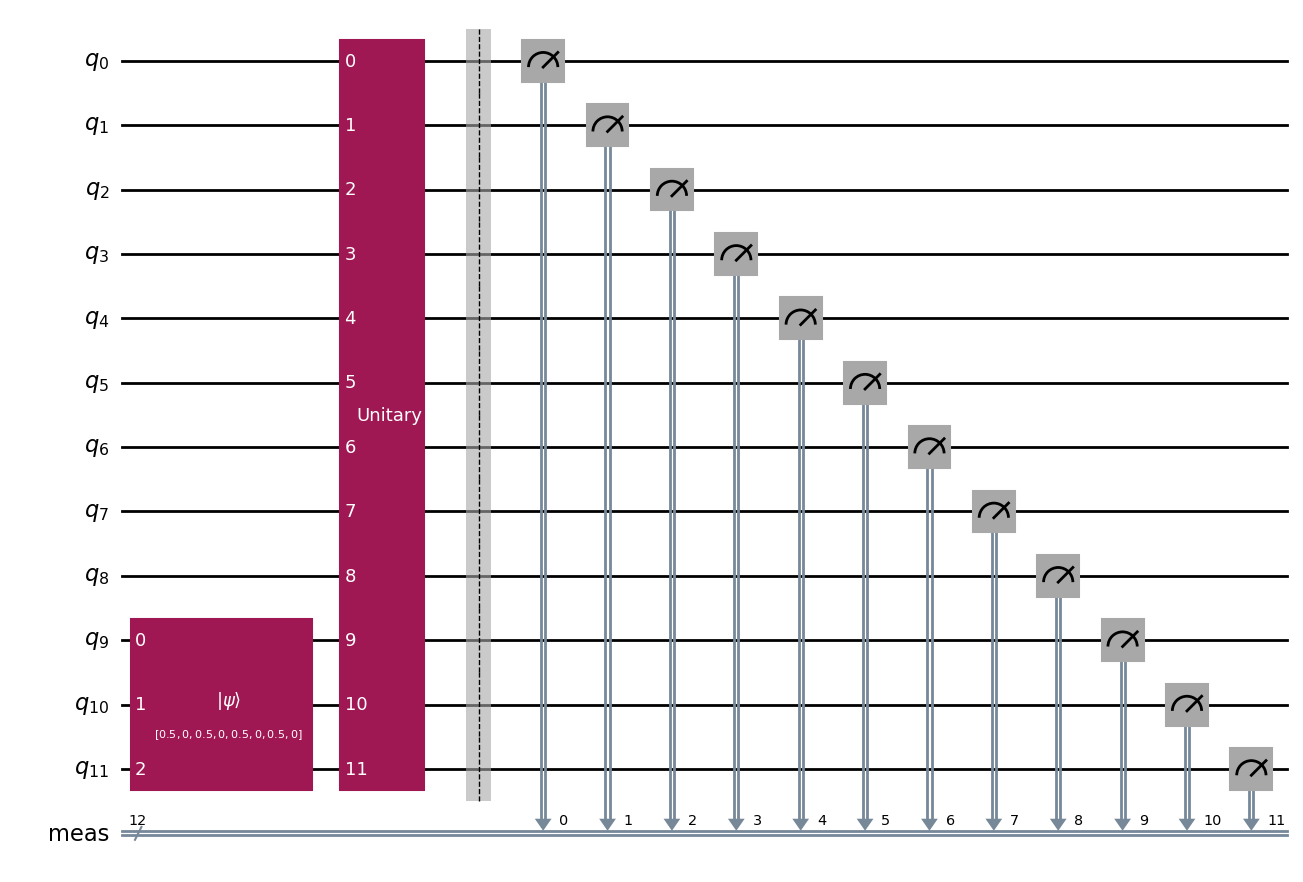

In [3]:
circuit = geqie.encode(ncqi.init_function, ncqi.data_function, ncqi.map_function, image)
circuit.draw(output='mpl')

### Simulating the circuit

In [4]:
result = geqie.simulate(circuit, 1000)

## Interpretation of the results

Total state $\ket{\psi}$ is equal to:
$$\ket{\psi} = \ket{X\_ coordinates}^{log_2(x)}\otimes\ket{Y\_ coordinates}^{log_2(y)}\otimes\ket{color}^{\otimes 8}\otimes\ket{RGB\_channel}^{\otimes 2}$$
Where:
- $\ket{X\_ coordinates}^{log_2(x)}$ and $\ket{Y\_ coordinates}^{log_2(y)}$ corresponds to X and Y positions encodings respectively,
- Next 8 qubits are used to encode color intensity for single channel, for example: $77 = \ket{01001101}$ (corresponds to $2^6+2^3+2^2+2^0$),
- 

In [31]:
retrived_image = np.zeros_like(image)

for state, n in result.items():
    if n > 0:
        x = state[0:1]
        y = state[1:2]
        c = state[2:13] 
        x_dec = int(x, base=2)
        y_dec = int(y, base=2)
        if c[8:10] == "00":
            # print(c[0:2])
            retrived_image[x_dec, y_dec, 0] = int(c[0:8], base=2)
        elif c[8:10] == "01":
            retrived_image[x_dec, y_dec, 1] = int(c[0:8], base=2)
        elif c[8:10] == "10":
            retrived_image[x_dec, y_dec, 2] = int(c[0:8], base=2)

print('\nOriginal image:')
print(image)
print('Retrived image:')
print(f"{retrived_image}")



Original image:
[[[255   0   0]
  [  0 127   0]]

 [[  0   0  85]
  [119 119 119]]]
Retrived image:
[[[255   0   0]
  [  0 127   0]]

 [[  0   0  85]
  [119 119 119]]]


### Retrived image

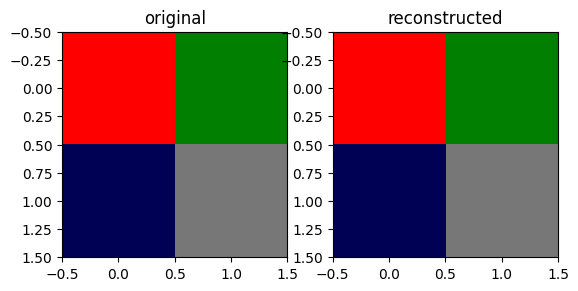

In [33]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image)

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(retrived_image)
